# The NSL-KDD Lab - Unsupervised
### ESPRIT 2023-2024 - Machine Learning

## Libraries

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px


## Dataset

In [2]:
feature_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","xAttack","level"]
train = pd.read_csv('KDDTrain+.txt', header=None, names=feature_names)
test = pd.read_csv('KDDTest+.txt', header=None, names=feature_names)

## Data Exploration

In [3]:
train.shape


(125973, 43)

In [4]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
train.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [6]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## Data Preparation

**It can be observed that there are no missing values in our dataset**

In [9]:
train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
test.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h


**It can also be noted that there are no duplicate rows in our dataset**

In [11]:
train.duplicated().sum()

0

In [12]:
test.duplicated().sum()

0


**To enhance the model's performance, it is advisable to remove the "service" and "flag" columns from the dataset. These columns may not contribute significantly to the prediction, and their removal could potentially improve the model's efficiency and reduce complexity**

In [13]:
train = train.drop(['service'],axis=1)
test = test.drop(['service'],axis=1)

In [14]:
train = train.drop(['flag'],axis=1)

test = test.drop(['flag'],axis=1)


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   src_bytes                    125973 non-null  int64  
 3   dst_bytes                    125973 non-null  int64  
 4   land                         125973 non-null  int64  
 5   wrong_fragment               125973 non-null  int64  
 6   urgent                       125973 non-null  int64  
 7   hot                          125973 non-null  int64  
 8   num_failed_logins            125973 non-null  int64  
 9   logged_in                    125973 non-null  int64  
 10  num_compromised              125973 non-null  int64  
 11  root_shell                   125973 non-null  int64  
 12  su_attempted                 125973 non-null  int64  
 13 

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   src_bytes                    22544 non-null  int64  
 3   dst_bytes                    22544 non-null  int64  
 4   land                         22544 non-null  int64  
 5   wrong_fragment               22544 non-null  int64  
 6   urgent                       22544 non-null  int64  
 7   hot                          22544 non-null  int64  
 8   num_failed_logins            22544 non-null  int64  
 9   logged_in                    22544 non-null  int64  
 10  num_compromised              22544 non-null  int64  
 11  root_shell                   22544 non-null  int64  
 12  su_attempted                 22544 non-null  int64  
 13  num_root        


**The "protocol_type" column has been filtered to retain only the rows where the protocol type is "tcp," and other rows have been removed. This filtering likely helps focus the analysis and model training on instances involving the TCP protocol, potentially improving the model's ability to capture patterns specific to this protocol**

In [18]:
train = train[train['protocol_type'] == 'tcp']
test = test[test['protocol_type'] == 'tcp']

In [19]:
train

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,level
0,0,tcp,491,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
2,0,tcp,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,232,8153,0,0,0,0,0,1,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,199,420,0,0,0,0,0,1,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,359,375,0,0,0,0,0,1,...,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal,18
125968,0,tcp,0,0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125970,0,tcp,2231,384,0,0,0,0,0,1,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,0,0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [20]:
test

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,level
0,0,tcp,0,0,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,0,0,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,12983,0,0,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
4,1,tcp,0,15,0,0,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
5,0,tcp,267,14515,0,0,0,0,0,1,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1,tcp,2599,293,0,0,0,0,0,1,...,0.73,0.13,0.00,0.00,0.00,0.0,0.26,0.00,mailbomb,11
22539,0,tcp,794,333,0,0,0,0,0,1,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,317,938,0,0,0,0,0,1,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,54540,8314,0,0,0,2,0,1,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15


**it seems that the information inside protocol_type is irrelevant so we'll drop the column**

In [21]:
train = train.drop(['protocol_type'],axis=1)

In [22]:
test = test.drop(['protocol_type'],axis=1)

In [23]:
train.nunique()

duration                       1796
src_bytes                      3326
dst_bytes                      9282
land                              2
wrong_fragment                    1
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       100
serror_rate                      81
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate                    96
diff_srv_rate                    94
srv_diff_host_rate          

In [24]:
test.nunique()

duration                        612
src_bytes                      1112
dst_bytes                      3587
land                              2
wrong_fragment                    1
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           409
srv_count                       140
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate                    62
diff_srv_rate                    51
srv_diff_host_rate          

**it seems that the information inside wrong_fragment is irrelevant so we'll drop the column**

In [25]:
train = train.drop(['wrong_fragment'],axis=1)
test = test.drop(['wrong_fragment'],axis=1)

**it seems that the information inside num_outbound_cmds is irrelevant so we'll drop the column**

In [26]:
train = train.drop(['num_outbound_cmds'],axis=1)
test = test.drop(['num_outbound_cmds'],axis=1)

In [27]:
train.nunique()

duration                       1796
src_bytes                      3326
dst_bytes                      9282
land                              2
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       100
serror_rate                      81
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate                    96
diff_srv_rate                    94
srv_diff_host_rate               59
dst_host_count                  256
dst_host_srv_count          

In [28]:
test.nunique()

duration                        612
src_bytes                      1112
dst_bytes                      3587
land                              2
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
is_host_login                     2
is_guest_login                    2
count                           409
srv_count                       140
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate                    62
diff_srv_rate                    51
srv_diff_host_rate               82
dst_host_count                  256
dst_host_srv_count          

In [29]:
#train['xAttack'] = train.xAttack.map(lambda a: 0 if a == 'normal' else 1)
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(xAttack):
    if xAttack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif xAttack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif xAttack in privilege_attacks:
            attack_type = 3
    elif xAttack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# map the data and join to the data set
attack_map = train.xAttack.apply(map_attack)
train['attack_map'] = attack_map
attack_map = test.xAttack.apply(map_attack)
test['attack_map'] = attack_map
test

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,level,attack_map
0,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
1,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
2,2,12983,0,0,0,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0
4,1,0,15,0,0,0,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,2
5,0,267,14515,0,0,0,0,1,0,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1,2599,293,0,0,0,0,1,0,0,...,0.13,0.00,0.00,0.00,0.0,0.26,0.00,mailbomb,11,1
22539,0,794,333,0,0,0,0,1,0,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,0
22540,0,317,938,0,0,0,0,1,0,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,0
22541,0,54540,8314,0,0,2,0,1,1,0,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15,1


In [30]:
train = train.drop(['xAttack'],axis=1)
test = test.drop(['xAttack'],axis=1)


In [31]:
train = train.rename(columns={'attack_map': 'xAttack'})
test = test.rename(columns={'attack_map': 'xAttack'})


In [32]:
test

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,xAttack
0,0,0,0,0,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,1
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,1
2,2,12983,0,0,0,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21,0
4,1,0,15,0,0,0,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,2
5,0,267,14515,0,0,0,0,1,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1,2599,293,0,0,0,0,1,0,0,...,0.73,0.13,0.00,0.00,0.00,0.0,0.26,0.00,11,1
22539,0,794,333,0,0,0,0,1,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,21,0
22540,0,317,938,0,0,0,0,1,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,21,0
22541,0,54540,8314,0,0,2,0,1,1,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,15,1


In [33]:
X_train =  train.drop(['xAttack'], axis=1)
y_train = train['xAttack']
X_train.nunique()

duration                       1796
src_bytes                      3326
dst_bytes                      9282
land                              2
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       100
serror_rate                      81
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate                    96
diff_srv_rate                    94
srv_diff_host_rate               59
dst_host_count                  256
dst_host_srv_count          

In [34]:
X_test =  test.drop(['xAttack'], axis=1)
y_test = test['xAttack']
X_test.nunique()

duration                        612
src_bytes                      1112
dst_bytes                      3587
land                              2
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
is_host_login                     2
is_guest_login                    2
count                           409
srv_count                       140
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate                    62
diff_srv_rate                    51
srv_diff_host_rate               82
dst_host_count                  256
dst_host_srv_count          

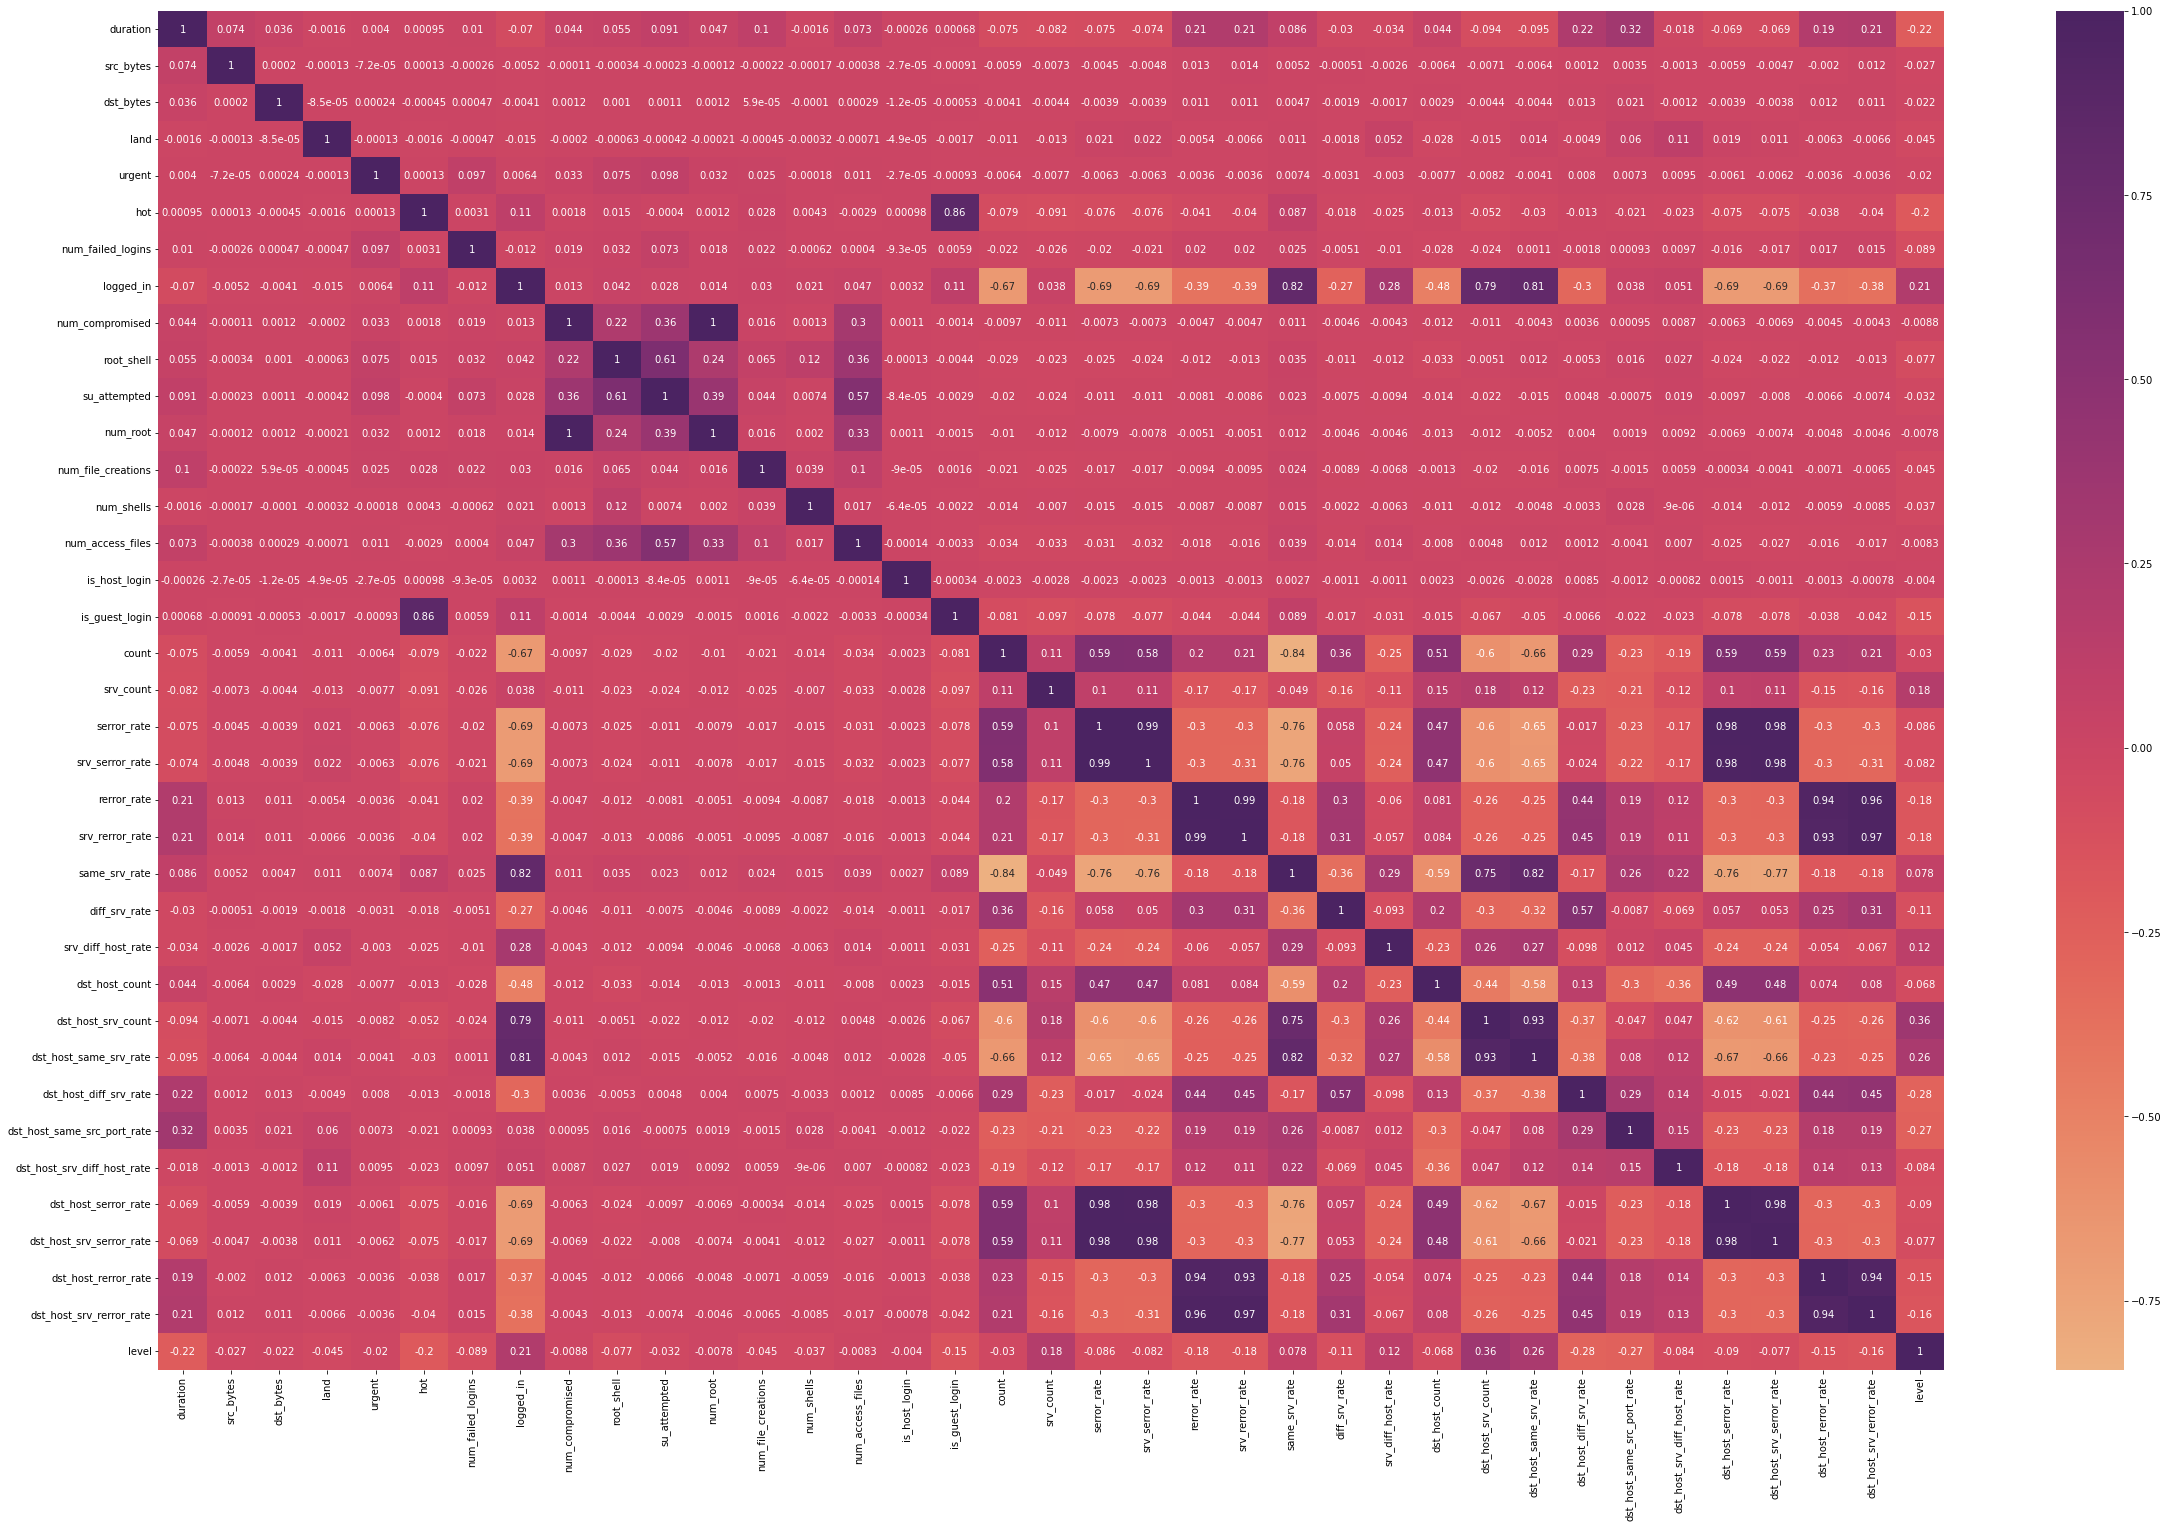

In [35]:
plt.figure(figsize=(40,25))
sns.heatmap(X_train.corr(),annot= True,cmap = 'flare')
plt.show()

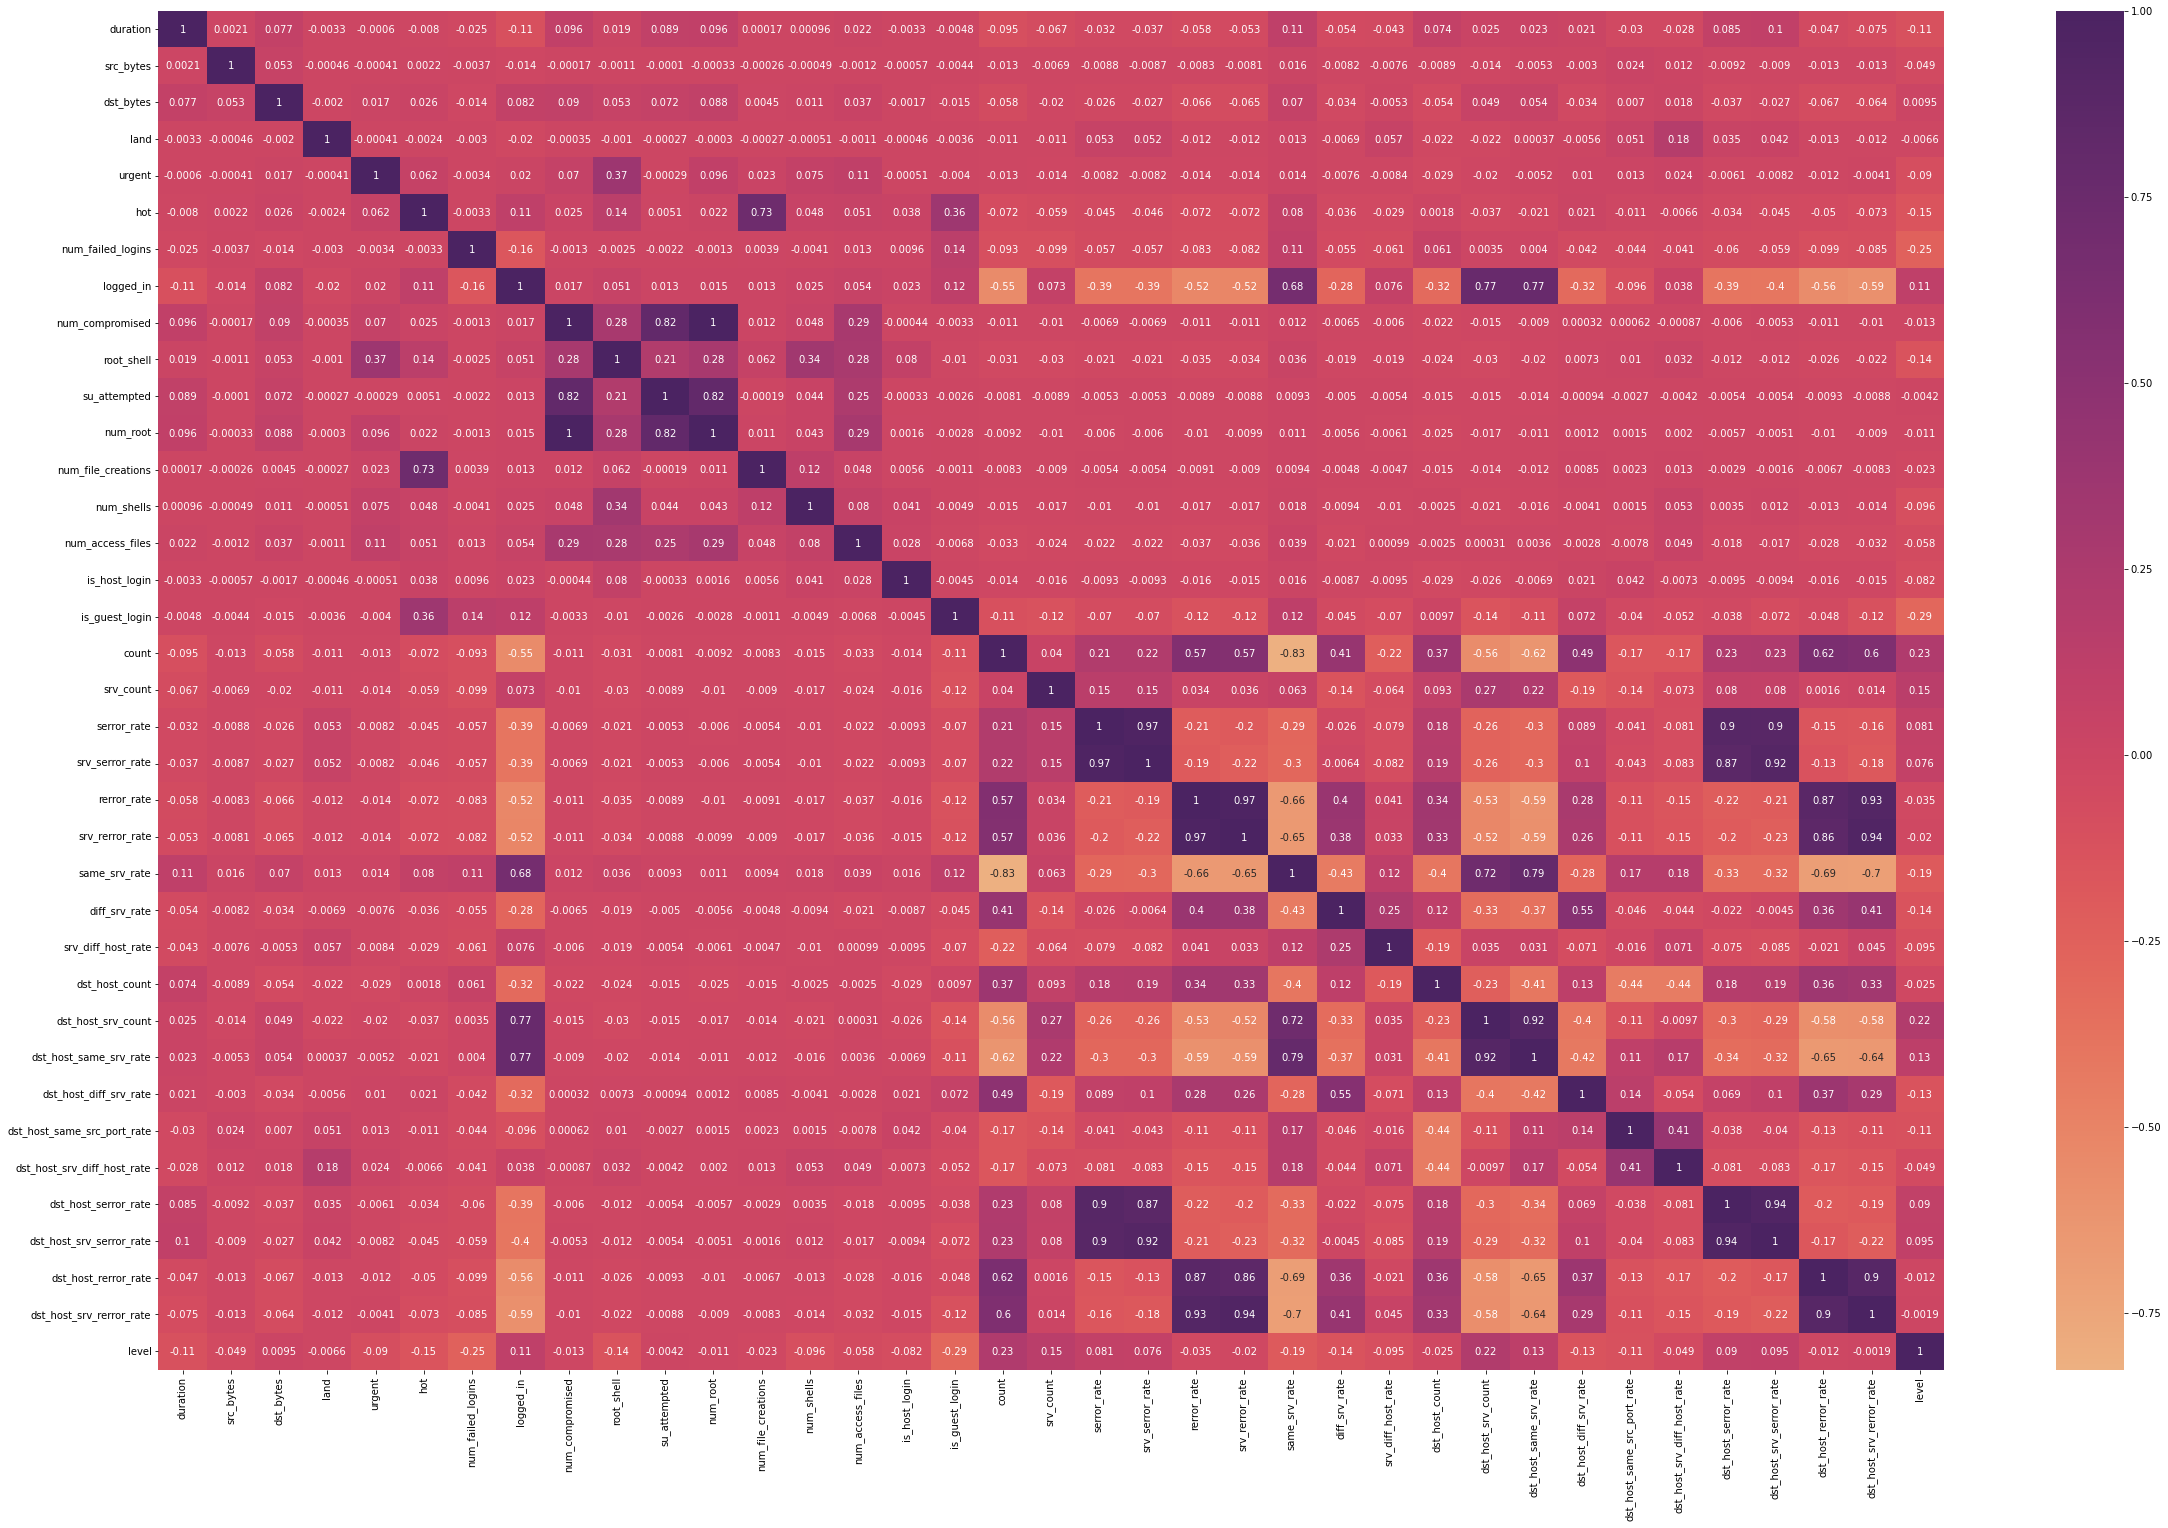

In [36]:
plt.figure(figsize=(40,25))
sns.heatmap(X_test.corr(),annot= True,cmap = 'flare')
plt.show()

In [37]:
corr_matrix = X_train.corr().abs()
corr_matrix

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
duration,1.000000,0.073508,0.036246,0.001581,0.003997,0.000952,0.009962,0.070286,0.044368,0.054938,...,0.094117,0.094749,0.224808,0.324746,0.017942,0.068963,0.068534,0.188334,0.211050,0.218687
src_bytes,0.073508,1.000000,0.000195,0.000134,0.000072,0.000128,0.000256,0.005171,0.000106,0.000336,...,0.007086,0.006433,0.001156,0.003517,0.001315,0.005876,0.004706,0.002025,0.011983,0.027378
dst_bytes,0.036246,0.000195,1.000000,0.000085,0.000240,0.000450,0.000474,0.004112,0.001220,0.001029,...,0.004356,0.004363,0.012716,0.020789,0.001200,0.003903,0.003812,0.011707,0.010982,0.021717
land,0.001581,0.000134,0.000085,1.000000,0.000134,0.001645,0.000467,0.015158,0.000202,0.000634,...,0.014724,0.014282,0.004945,0.059878,0.113756,0.018700,0.010768,0.006304,0.006612,0.045092
urgent,0.003997,0.000072,0.000240,0.000134,1.000000,0.000126,0.097468,0.006372,0.033309,0.075146,...,0.008219,0.004136,0.007961,0.007256,0.009478,0.006135,0.006211,0.003596,0.003631,0.020200
hot,0.000952,0.000128,0.000450,0.001645,0.000126,1.000000,0.003136,0.107384,0.001764,0.014606,...,0.051673,0.030036,0.012559,0.021154,0.023160,0.075325,0.075163,0.037770,0.040480,0.200049
num_failed_logins,0.009962,0.000256,0.000474,0.000467,0.097468,0.003136,1.000000,0.012352,0.019015,0.032351,...,0.023757,0.001114,0.001792,0.000931,0.009748,0.016251,0.016894,0.017338,0.015302,0.088976
logged_in,0.070286,0.005171,0.004112,0.015158,0.006372,0.107384,0.012352,1.000000,0.013300,0.041799,...,0.786156,0.814752,0.303718,0.038067,0.051087,0.689442,0.690058,0.365716,0.376581,0.210412
num_compromised,0.044368,0.000106,0.001220,0.000202,0.033309,0.001764,0.019015,0.013300,1.000000,0.224813,...,0.010659,0.004280,0.003603,0.000952,0.008674,0.006332,0.006861,0.004524,0.004284,0.008804
root_shell,0.054938,0.000336,0.001029,0.000634,0.075146,0.014606,0.032351,0.041799,0.224813,1.000000,...,0.005144,0.012264,0.005298,0.015918,0.027311,0.023731,0.021934,0.011805,0.013084,0.076988


In [38]:
corr_matrixx = X_test.corr().abs()
corr_matrixx

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
duration,1.000000,0.002100,0.076941,0.003264,0.000602,0.007965,0.025476,0.110471,0.095680,0.018602,...,0.025202,0.022921,0.021263,0.029548,0.028229,0.085231,0.099738,0.046873,0.074853,0.113712
src_bytes,0.002100,1.000000,0.053297,0.000459,0.000412,0.002172,0.003720,0.014407,0.000165,0.001062,...,0.013851,0.005268,0.002952,0.023977,0.011896,0.009230,0.009038,0.013049,0.012654,0.048581
dst_bytes,0.076941,0.053297,1.000000,0.002035,0.017213,0.025873,0.013865,0.081784,0.089585,0.053282,...,0.048800,0.054234,0.033639,0.006960,0.017531,0.037078,0.027279,0.066676,0.064100,0.009494
land,0.003264,0.000459,0.002035,1.000000,0.000410,0.002392,0.003037,0.020370,0.000347,0.001041,...,0.022275,0.000373,0.005623,0.051450,0.180846,0.035078,0.041677,0.012829,0.012288,0.006603
urgent,0.000602,0.000412,0.017213,0.000410,1.000000,0.061631,0.003353,0.020105,0.070056,0.368748,...,0.019896,0.005248,0.010471,0.012541,0.024369,0.006087,0.008210,0.012490,0.004075,0.089995
hot,0.007965,0.002172,0.025873,0.002392,0.061631,1.000000,0.003321,0.111774,0.024658,0.139746,...,0.036773,0.021156,0.020650,0.010883,0.006642,0.033660,0.045004,0.049794,0.073008,0.148236
num_failed_logins,0.025476,0.003720,0.013865,0.003037,0.003353,0.003321,1.000000,0.160296,0.001337,0.002528,...,0.003541,0.004038,0.042283,0.044481,0.040916,0.060415,0.059059,0.099030,0.084667,0.249752
logged_in,0.110471,0.014407,0.081784,0.020370,0.020105,0.111774,0.160296,1.000000,0.017040,0.051104,...,0.767562,0.765870,0.315240,0.096421,0.037965,0.392635,0.403399,0.555404,0.590622,0.114474
num_compromised,0.095680,0.000165,0.089585,0.000347,0.070056,0.024658,0.001337,0.017040,1.000000,0.283958,...,0.014850,0.008980,0.000317,0.000615,0.000869,0.006003,0.005316,0.011440,0.010170,0.012797
root_shell,0.018602,0.001062,0.053282,0.001041,0.368748,0.139746,0.002528,0.051104,0.283958,1.000000,...,0.029733,0.019726,0.007308,0.010018,0.032098,0.012348,0.011853,0.025934,0.022464,0.138897


In [39]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(dtype=bool))
upperr = corr_matrix.where(np.triu(np.ones(corr_matrixx.shape), k=1).astype(dtype=bool))


In [40]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_rerror_rate']

In [41]:
to_dropp = [column for column in upperr.columns if any(upperr[column] > 0.95)]
to_dropp

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_rerror_rate']

In [42]:
X_train.drop(to_drop, axis=1, inplace=True)

In [43]:
X_test.drop(to_dropp, axis=1, inplace=True)

In [44]:
X_train.nunique()

duration                       1796
src_bytes                      3326
dst_bytes                      9282
land                              2
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_file_creations               35
num_shells                        3
num_access_files                 10
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       100
serror_rate                      81
rerror_rate                      82
same_srv_rate                    96
diff_srv_rate                    94
srv_diff_host_rate               59
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate 

In [45]:
X_test.nunique()

duration                        612
src_bytes                      1112
dst_bytes                      3587
land                              2
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_file_creations                9
num_shells                        4
num_access_files                  5
is_host_login                     2
is_guest_login                    2
count                           409
srv_count                       140
serror_rate                      88
rerror_rate                      90
same_srv_rate                    62
diff_srv_rate                    51
srv_diff_host_rate               82
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate 

In [46]:
X_train = X_train.drop(['land','urgent','num_failed_logins','root_shell','su_attempted','num_access_files','is_host_login','is_guest_login','num_shells'],axis=1)


In [47]:
X_test = X_test.drop(['land','urgent','num_failed_logins','root_shell','su_attempted','num_access_files','is_host_login','is_guest_login','num_shells'],axis=1)


In [48]:
X_train.nunique()

duration                       1796
src_bytes                      3326
dst_bytes                      9282
hot                              28
logged_in                         2
num_compromised                  88
num_file_creations               35
count                           512
srv_count                       100
serror_rate                      81
rerror_rate                      82
same_srv_rate                    96
diff_srv_rate                    94
srv_diff_host_rate               59
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate     101
dst_host_srv_diff_host_rate      61
dst_host_rerror_rate            101
level                            22
dtype: int64

In [49]:
X_test.nunique()

duration                        612
src_bytes                      1112
dst_bytes                      3587
hot                              16
logged_in                         2
num_compromised                  23
num_file_creations                9
count                           409
srv_count                       140
serror_rate                      88
rerror_rate                      90
same_srv_rate                    62
diff_srv_rate                    51
srv_diff_host_rate               82
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate     100
dst_host_srv_diff_host_rate      43
dst_host_rerror_rate            101
level                            22
dtype: int64

In [50]:
X_train

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_file_creations,count,srv_count,serror_rate,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,level
0,0,491,0,0,0,0,0,2,2,0.00,...,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.05,20
2,0,0,0,0,0,0,0,123,6,1.00,...,0.07,0.00,255,26,0.10,0.05,0.00,0.00,0.00,19
3,0,232,8153,0,1,0,0,5,5,0.20,...,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.00,21
4,0,199,420,0,1,0,0,30,32,0.00,...,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,21
5,0,0,0,0,0,0,0,121,19,0.00,...,0.06,0.00,255,19,0.07,0.07,0.00,0.00,1.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,359,375,0,1,0,0,3,11,0.33,...,0.00,0.18,3,255,1.00,0.00,0.33,0.04,0.00,18
125968,0,0,0,0,0,0,0,184,25,1.00,...,0.06,0.00,255,25,0.10,0.06,0.00,0.00,0.00,20
125970,0,2231,384,0,1,0,0,1,1,0.00,...,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.01,18
125971,0,0,0,0,0,0,0,144,8,1.00,...,0.05,0.00,255,8,0.03,0.05,0.00,0.00,0.00,20


In [51]:
X_test

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_file_creations,count,srv_count,serror_rate,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,level
0,0,0,0,0,0,0,0,229,10,0.0,...,0.06,0.00,255,10,0.04,0.06,0.00,0.00,1.00,21
1,0,0,0,0,0,0,0,136,1,0.0,...,0.06,0.00,255,1,0.00,0.06,0.00,0.00,1.00,21
2,2,12983,0,0,0,0,0,1,1,0.0,...,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,21
4,1,0,15,0,0,0,0,1,8,0.0,...,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.83,11
5,0,267,14515,0,1,0,0,4,4,0.0,...,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1,2599,293,0,1,0,0,2,2,0.0,...,0.00,0.00,255,186,0.73,0.13,0.00,0.00,0.26,11
22539,0,794,333,0,1,0,0,1,1,0.0,...,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.00,21
22540,0,317,938,0,1,0,0,2,11,0.0,...,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.00,21
22541,0,54540,8314,2,1,1,0,5,10,0.0,...,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.07,15


In [52]:
X_train.describe()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_file_creations,count,srv_count,serror_rate,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,level
count,102689.000000,1.026890e+05,1.026890e+05,102689.000000,102689.000000,102689.000000,102689.000000,102689.000000,102689.000000,102689.000000,...,102689.000000,102689.000000,102689.000000,102689.000000,102689.000000,102689.000000,102689.000000,102689.000000,102689.000000,102689.000000
mean,281.386419,5.586074e+04,2.425355e+04,0.250757,0.485466,0.342568,0.015542,81.460449,9.443066,0.348274,...,0.063619,0.075875,181.411329,110.260301,0.478294,0.080287,0.078612,0.020611,0.138867,19.794691
std,2776.679452,6.501848e+06,4.453886e+06,2.378832,0.499791,26.517444,0.535958,107.293519,9.420621,0.471184,...,0.178531,0.219206,97.978025,112.191896,0.450718,0.182660,0.211666,0.078877,0.330876,2.185327
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,81.000000,9.000000,0.040000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,1.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,14.000000,7.000000,0.000000,...,0.000000,0.000000,255.000000,39.000000,0.250000,0.050000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.920000e+02,1.053000e+03,0.000000,1.000000,0.000000,0.000000,143.000000,15.000000,1.000000,...,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.020000,0.020000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,77.000000,1.000000,7479.000000,43.000000,511.000000,163.000000,1.000000,...,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [53]:
X_test.describe()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_file_creations,count,srv_count,serror_rate,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,level
count,18880.000000,1.888000e+04,1.888000e+04,18880.000000,18880.000000,18880.000000,18880.000000,18880.000000,18880.000000,18880.000000,...,18880.000000,18880.000000,18880.000000,18880.000000,18880.000000,18880.000000,18880.000000,18880.000000,18880.000000,18880.000000
mean,258.568379,1.231732e+04,2.447656e+03,0.125847,0.528019,0.143167,0.010434,65.939407,9.913718,0.122895,...,0.091635,0.100114,189.301854,132.699206,0.568665,0.087798,0.059066,0.014364,0.274741,18.382998
std,1525.457268,5.166082e+05,2.316678e+04,1.013260,0.499228,7.943561,0.739599,110.378643,13.883324,0.318934,...,0.254814,0.253852,95.437679,111.770340,0.437773,0.212627,0.193396,0.047458,0.408172,4.033623
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,103.000000,13.000000,0.060000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,1.530000e+02,9.300000e+01,0.000000,1.000000,0.000000,0.000000,7.000000,5.000000,0.000000,...,0.000000,0.000000,255.000000,124.000000,0.760000,0.020000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.920000e+02,1.042250e+03,0.000000,1.000000,0.000000,0.000000,110.000000,14.000000,0.000000,...,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.010000,0.020000,0.670000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,101.000000,1.000000,796.000000,100.000000,511.000000,150.000000,1.000000,...,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [54]:
from sklearn.preprocessing import MinMaxScaler

def normalization(data):
    scaler = MinMaxScaler()

    for idx in range(len(data.columns)):
        if data.nunique()[idx] != 2:
            column_data = np.array(data.iloc[:, idx]).reshape(-1, 1)
            data.iloc[:, idx] = scaler.fit_transform(column_data).reshape(-1)

    return data

In [55]:
from sklearn.decomposition import PCA

def PCA_transformation(data, dim = None):
    pca = PCA()
    pca.fit(data)
    cum_vars = np.cumsum(pca.explained_variance_ratio_)
    for i in range(len(cum_vars)):
        if cum_vars[i] == 0.999:
            break
    if dim:
        pca = PCA(dim)
        data = pca.fit_transform(data)
        return pd.DataFrame(data)
    
    pca = PCA(i)
    data = pca.fit_transform(data)
    return pd.DataFrame(data), i

In [56]:
from tqdm import tqdm
from scipy.stats import norm

def GMM_Row_Transform(data, values, threshold):
    probs = []
    for idx in range(len(data.columns)):
        mean = np.array(data.iloc[:,idx]).mean()
        std = np.array(data.iloc[:,idx]).std()

        z_score = (values[idx] - mean)/std
        prob = (1-norm.cdf(z_score))*100
        probs.append(prob)
    return probs

In [57]:
def GMM_Matrix_Transform(origin_data, data, threshold):
    matrix = []
    for i in tqdm(range(len(data))):
        row = GMM_Row_Transform(origin_data, data.iloc[i,:], threshold)
        
        matrix.append(row)
    return matrix

In [58]:
def GMM_vote(data, values, threshold):
    no = 0
    for idx in range(len(data.columns)):
        mean = np.array(data.iloc[:,idx]).mean()
        std = np.array(data.iloc[:,idx]).std()

        z_score = (values[idx] - mean)/std
        prob = (1-norm.cdf(z_score))*100
        if prob <= threshold:
            no += 1
    return no

In [59]:
d_raw_train = X_train
d_raw_test = X_test

In [60]:
d_raw_train.shape

(102689, 22)

In [61]:
d_raw_pca_train ,dim = PCA_transformation(d_raw_train)
d_raw_pca_test ,dim = PCA_transformation(d_raw_test)

In [62]:
d_norm_train = normalization(d_raw_train)
d_norm_test = normalization(d_raw_test)

In [63]:
d_norm_pca_train, dim = PCA_transformation(normalization(d_raw_train))
d_norm_pca_test, dim = PCA_transformation(normalization(d_raw_test))

In [64]:
d_raw_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_raw_train, d_raw_train, 50))
d_raw_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_raw_test, d_raw_test, 50))

100%|██████████| 18880/18880 [01:48<00:00, 174.22it/s]


In [65]:
d_raw_pca_probs_train, dim = PCA_transformation(d_raw_train)
d_raw_pca_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_probs_train, d_raw_pca_probs_train, 50))

d_raw_pca_probs_test, dim = PCA_transformation(d_raw_test)
d_raw_pca_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_probs_test, d_raw_pca_probs_test, 50))

100%|██████████| 18880/18880 [02:39<00:00, 118.28it/s]


In [66]:
d_norm_probs_train = normalization(d_raw_train)
d_norm_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_norm_probs_train, d_norm_probs_train, 50))

d_norm_probs_test = normalization(d_raw_test)
d_norm_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_norm_probs_test, d_norm_probs_test, 50))

100%|██████████| 18880/18880 [02:54<00:00, 108.11it/s]


In [67]:
d_norm_pca_probs_train = normalization(d_raw_train)
d_norm_pca_probs_train, dim = PCA_transformation(d_norm_pca_probs_train)
d_norm_pca_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_probs_train, d_norm_pca_probs_train, 50))

d_norm_pca_probs_test = normalization(d_raw_test)
d_norm_pca_probs_test, dim = PCA_transformation(d_norm_pca_probs_test)
d_norm_pca_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_probs_test, d_norm_pca_probs_test, 50))

100%|██████████| 18880/18880 [01:45<00:00, 179.58it/s]


## Modeling

**Now, We'll try to find the best model for our dataset**

**Voting**

In [68]:
def voting(data_train, data_test, min_abnormal_features = 10, threshold = 50):
    preds = []
    for idx in tqdm(range(len(data_test))):
        values = list(data_test.iloc[idx,:])
        no = GMM_vote(data_train, values, threshold)
        if no > min_abnormal_features:
            preds.append(1)
        else:
            preds.append(0)
    return preds

d_raw_probs_train (E6)

In [69]:
voting_d_raw_probs_train = voting(d_raw_probs_train, d_raw_probs_test, min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [03:13<00:00, 97.65it/s] 


d_raw_pca_probs_train (E8)

In [70]:
voting_d_raw_pca_probs_train = voting(d_raw_pca_probs_train, d_raw_pca_probs_test, min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [03:10<00:00, 99.24it/s] 


d_norm_probs_train (E2)

In [71]:
voting_d_norm_probs_train = voting(d_norm_probs_train, d_norm_probs_test, min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [03:16<00:00, 96.30it/s]


d_norm_pca_probs_train(E4)

In [72]:
votingd_norm_pca_probs_train = voting(d_norm_pca_probs_train, d_norm_pca_probs_test, min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [04:41<00:00, 66.95it/s]  


__SVM1__

In [247]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import svm
def svm1(X_train, X_test):
    # Train One-Class SVM for anomaly detection
    novelty_detector = OneClassSVM()
    novelty_detector.fit(X_train)
    
    # Predict anomaly labels on the test set
    anomaly_predictions = novelty_detector.predict(X_test)
    
    return anomaly_predictions

d_raw_train(E5)

In [248]:
svm1_d_raw = svm1(d_raw_train, d_raw_test)

d_norm_train ( E1)

In [249]:
svm1_d_norm_raw = svm1(d_norm_train, d_norm_test)

d_raw_pca_train ( E7)

In [250]:
svm1_d_pca_raw = svm1(d_raw_pca_train, d_raw_pca_test)

d_norm_pca_train(E3)

In [77]:
svm1_d_norm_pca_raw = svm1(d_norm_pca_train, d_norm_pca_test)

d_raw_probs_train (E6)

In [251]:
svm1_d_raw_probs = svm1(d_raw_probs_train, d_raw_probs_test)

d_raw_pca_probs_train (E8)

In [252]:
svm1_d_raw_pca_probs = svm1(d_raw_pca_probs_train, d_raw_pca_probs_test)

d_norm_probs_train (E2)

In [253]:
svm1_d_raw_probs_train = svm1(d_norm_probs_train, d_norm_probs_test)

d_norm_pca_probs_train(E4)

In [254]:
svm1_d_raw_norm_pca_probs_train= svm1(d_norm_pca_probs_train, d_norm_pca_probs_test)

__SVM2__

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import svm
#SVM2
def SVM_model2(train_data, test_data):
    model = SVC()
    model.fit(train_data, y_train)
    preds = model.predict(test_data)
    return preds




d_raw_train(E5)

In [83]:
svm2_d_raw = SVM_model2(d_raw_train, d_raw_test)

d_norm_train ( E1)

In [84]:
svm2_d_norm_raw = SVM_model2(d_norm_train, d_norm_test)

d_raw_pca_train ( E7)

In [85]:
svm2_d_pca_raw = SVM_model2(d_raw_pca_train, d_raw_pca_test)

d_norm_pca_train(E3)

In [86]:
svm2_d_norm_pca_raw = SVM_model2(d_norm_pca_train, d_norm_pca_test)

d_raw_probs_train (E6)

In [87]:
svm2_d_raw_probs = SVM_model2(d_raw_probs_train, d_raw_probs_test)

d_raw_pca_probs_train (E8)

In [88]:
svm2_d_raw_pca_probs = SVM_model2(d_raw_pca_probs_train, d_raw_pca_probs_test)

d_norm_probs_train (E2)

In [89]:
svm2_d_raw_probs_train = SVM_model2(d_norm_probs_train, d_norm_probs_test)

d_norm_pca_probs_train(E4)

In [90]:
svm2_d_raw_norm_pca_probs = SVM_model2(d_norm_pca_probs_train, d_norm_pca_probs_test)

__MLP__

In [91]:
def mlp_model(train_data, test_data):
    model = MLPClassifier(max_iter=300).fit(train_data, y_train)
    preds = model.predict(test_data)
    return preds

d_raw_train(E5)

In [92]:
from sklearn.neural_network import MLPClassifier
mlp_d_raw_preds = mlp_model(d_raw_train, d_raw_test)

d_norm_train ( E1)

In [93]:
mlp_d_norm_raw_preds = mlp_model(d_norm_train, d_norm_test)

d_raw_pca_train ( E7)

In [94]:
mlp_d_raw_pca_preds = mlp_model(d_raw_pca_train, d_raw_pca_test)

d_norm_pca_train(E3)

In [95]:
mlp_d_raw_norm_pca_preds = mlp_model(d_norm_pca_train, d_norm_pca_test)

d_raw_probs_train (E6)

In [96]:
mlp_d_raw_probs_preds = mlp_model(d_raw_probs_train, d_raw_probs_test)

d_raw_pca_probs_train (E8)

In [97]:
mlp_d_raw_pca_probs_preds = mlp_model(d_raw_pca_probs_train, d_raw_pca_probs_test)

d_norm_probs_train (E2)

In [98]:
mlp_d_norm_probs_preds = mlp_model(d_norm_probs_train, d_norm_probs_test)

d_norm_pca_probs_train(E4)

In [99]:
mlp_d_norm_pca_probs_preds = mlp_model(d_norm_pca_probs_train, d_norm_pca_probs_test)

__DT__

In [100]:
from sklearn import tree
def dt_model(train_data, test_data):
    model = tree.DecisionTreeClassifier()
    model.fit(train_data, y_train)
    preds = model.predict(test_data)
    return preds

d_raw_train(E5)

In [101]:

dt_d_raw_preds = dt_model(d_raw_train, d_raw_test)

d_norm_train ( E1)

In [102]:
dt_d_norm_raw_preds = dt_model(d_norm_train, d_norm_test)

d_raw_pca_train ( E7)

In [103]:
dt_d_raw_pca_preds = dt_model(d_raw_pca_train, d_raw_pca_test)

d_norm_pca_train(E3)

In [104]:
dt_d_raw_norm_pca_preds = dt_model(d_norm_pca_train, d_norm_pca_test)

d_raw_probs_train (E6)

In [105]:
dt_d_raw_probs_preds = dt_model(d_raw_probs_train, d_raw_probs_test)

d_raw_pca_probs_train (E8)

In [106]:
dt_d_raw_pca_probs_preds = dt_model(d_raw_pca_probs_train, d_raw_pca_probs_test)

d_norm_probs_train (E2)

In [107]:
dt_d_norm_probs_preds = dt_model(d_norm_probs_train, d_norm_probs_test)

d_norm_pca_probs_train(E4)

In [108]:
dt_d_norm_pca_probs_preds = dt_model(d_norm_pca_probs_train, d_norm_pca_probs_test)

__KMC__

In [109]:
from sklearn.cluster import KMeans

def kmean_C_model(train_data, test_data):
    kmeans = KMeans(n_clusters=2,n_init=10,random_state=42).fit(train_data)
    preds = kmeans.predict(test_data)
    return preds

d_raw_train(E5)

In [110]:
kmean_d_raw_preds = kmean_C_model(d_raw_train, d_raw_test)

d_norm_train ( E1)

In [111]:
kmean_d_norm_preds = kmean_C_model(d_norm_train, d_norm_test)

d_raw_pca_train ( E7)

In [112]:
kmean_d_raw_pca_preds = kmean_C_model(d_raw_pca_train, d_raw_pca_test)

d_norm_pca_train(E3)

In [113]:
kmean_d_norm_pca_preds = kmean_C_model(d_norm_pca_train, d_norm_pca_test)

d_raw_probs_train (E6)

In [114]:
kmean_d_raw_probs_preds = kmean_C_model(d_raw_probs_train, d_raw_probs_test)

d_raw_pca_probs_train (E8)

In [115]:
kmean_d_pca_probs_preds = kmean_C_model(d_raw_pca_probs_train, d_raw_pca_probs_test)

d_norm_probs_train (E2)

In [116]:
kmean_d_norm_probs_preds = kmean_C_model(d_norm_probs_train, d_norm_probs_test)

d_norm_pca_probs_train(E4)

In [117]:
kmean_d_norm_pca_probs_preds  = kmean_C_model(d_norm_pca_probs_train, d_norm_pca_probs_test)

__KMD__

In [118]:
def K_means_Distance(test_idx, test_data, model):
    c1 = np.array(test_data.iloc[test_idx,:])
    c2 = model.cluster_centers_[0]
    temp = c1 - c2
    euclid_dist = np.sqrt(np.dot(temp.T, temp))
    euclid_dist
    return euclid_dist

In [119]:
def kmd_model(test_data, train_data, model, threshold_dis):
    kmd_d_raw_preds  = [] 
    for idx in tqdm(range(len(test_data))):
        dis = K_means_Distance(idx, test_data, model)
        if dis > threshold_dis:
            kmd_d_raw_preds.append(1)
        else:
            kmd_d_raw_preds.append(0)
    return kmd_d_raw_preds

d_raw_train(E5)

In [120]:
kmeans1 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(d_raw_train)
kmd_d_raw_preds1 = kmd_model( d_raw_test, d_raw_train, kmeans1, 0.8)

100%|██████████| 18880/18880 [00:02<00:00, 9403.94it/s]


d_norm_train ( E1)

In [121]:
kmeans2 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(d_norm_train)
kmd_d_norm_preds = kmd_model( d_norm_test, d_norm_train, kmeans2, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 9631.26it/s]


d_raw_pca_train ( E7)

In [122]:
kmeans3 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(d_raw_pca_train)
kmd_d_raw_pca_preds = kmd_model( d_raw_pca_test, d_raw_pca_train, kmeans3, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 14786.57it/s]


d_norm_pca_train(E3)

In [123]:
kmeans4 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(d_norm_pca_train)
kmd_d_norm_pca_preds = kmd_model( d_norm_pca_test, d_norm_pca_train, kmeans4, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 15549.71it/s]


d_raw_probs_train (E6)

In [124]:
kmeans5 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(d_raw_probs_train)
kmd_d_raw_probs_preds = kmd_model(d_raw_probs_test, d_raw_probs_train, kmeans5, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 15420.72it/s]


d_raw_pca_probs_train (E8)

In [125]:
kmeans6 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(d_raw_pca_probs_train)
kmd_d_pca_probs_preds = kmd_model( d_raw_pca_probs_test, d_raw_pca_probs_train, kmeans6, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 15279.03it/s]


d_norm_probs_train (E2)

In [126]:
kmeans7 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(d_norm_probs_train)
kmd_d_norm_probs_preds = kmd_model( d_norm_probs_test, d_norm_probs_train, kmeans7, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 15008.02it/s]


d_norm_pca_probs_train(E4)

In [127]:
kmeans8 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(d_norm_pca_probs_train)
kmd_d_norm_pca_probs_preds = kmd_model( d_norm_pca_probs_test, d_norm_pca_probs_train, kmeans8, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 14699.71it/s]


## Evaluation

## F1

In [128]:
def f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

__E5__

__SVM1__

In [129]:
f1_d_raw_train= f1(y_test, svm1_d_raw)
f1_d_raw_train

0.07123940677966102

__SVM2__

In [130]:
f1_d_raw_train1= f1(y_test, svm2_d_raw)
f1_d_raw_train1

0.7904661016949153

__MLP__

In [131]:
f1_d_raw_train2= f1(y_test, mlp_d_raw_preds)
f1_d_raw_train2

0.8099046610169492

__DT__

In [132]:
f1_d_raw_train3= f1(y_test, dt_d_raw_preds)
f1_d_raw_train3

0.7823093220338984

__KMC__

In [133]:
f1_d_raw_train4= f1(y_test, kmean_d_raw_preds)
f1_d_raw_train4

0.6630826271186441

__KMD__

In [134]:
f1_d_raw_train5= f1(y_test, kmd_d_raw_preds1)
f1_d_raw_train5

0.2791843220338983

 **E1**

__SVM1__

In [135]:
f1_d_norm_train= f1(y_test, svm1_d_norm_raw)
f1_d_norm_train

0.07123940677966102

__SVM2__

In [136]:
f1_d_norm_train1= f1(y_test, svm2_d_norm_raw)
f1_d_norm_train1

0.7904661016949153

__MLP__

In [137]:
f1_d_norm_train2= f1(y_test, mlp_d_norm_raw_preds)
f1_d_norm_train2

0.7976694915254238

__DT__

In [138]:
f1_d_norm_train3= f1(y_test, dt_d_norm_raw_preds)
f1_d_norm_train3

0.7821504237288136

__KMC__

In [139]:
f1_d_norm_train4= f1(y_test, kmean_d_norm_preds)
f1_d_norm_train4

0.6630826271186441

__KMD__

In [140]:
f1_d_norm_train5= f1(y_test, kmd_d_norm_preds)
f1_d_norm_train5

0.2791843220338983

E7

__SVM1__

In [141]:
f1_d_raw_pca_train1= f1(y_test, svm1_d_pca_raw)
f1_d_raw_pca_train1

0.0

__SVM2__

In [142]:
f1_d_raw_pca_train1= f1(y_test, svm2_d_pca_raw)
f1_d_raw_pca_train1

0.42282838983050847

__MLP__

In [143]:
f_d_raw_pca_train2= f1(y_test, mlp_d_raw_pca_preds)
f_d_raw_pca_train2

0.4514830508474576

__DT__

In [144]:
f1_d_raw_pca_train3= f1(y_test, dt_d_raw_pca_preds)
f1_d_raw_pca_train3

0.4492584745762712

__KMC__

In [145]:
f1_d_raw_pca_train4= f1(y_test, kmean_d_raw_pca_preds)
f1_d_raw_pca_train4

0.4229872881355932

__KMD__

In [146]:
f1_d_raw_pca_train5= f1(y_test, kmd_d_raw_pca_preds)
f1_d_raw_pca_train5

0.3569915254237288

__E3__

__SVM1__

In [147]:
f1_d_norm_pca_train1= f1(y_test, svm1_d_norm_pca_raw)
f1_d_norm_pca_train1

0.013029661016949152

__SVM2__

In [148]:
f1_d_norm_pca_train2= f1(y_test, svm2_d_norm_pca_raw)
f1_d_norm_pca_train2

0.0784427966101695

__MLP__

In [149]:
f_d_norm_pca_train2= f1(y_test, mlp_d_raw_norm_pca_preds)
f_d_norm_pca_train2

0.08199152542372881

__DT__

In [150]:
f1_d_norm_pca_train3= f1(y_test, dt_d_raw_norm_pca_preds)
f1_d_norm_pca_train3

0.13252118644067798

__KMC__

In [151]:
f1_d_norm_pca_train4= f1(y_test, kmean_d_raw_pca_preds)
f1_d_norm_pca_train4

0.4229872881355932

__KMD__

In [152]:
f1_d_norm_pca_train5= f1(y_test, kmd_d_norm_pca_preds)
f1_d_norm_pca_train5

0.6767478813559322

**E6**

SVM1

In [153]:
f1_d_raw_probs= f1(y_test, svm1_d_raw_probs)
f1_d_raw_probs

0.020709745762711864

SVM2

In [154]:
f2_d_raw_probs= f1(y_test, svm2_d_raw_probs)
f2_d_raw_probs

0.745603813559322

MLP

In [155]:
f3_d_raw_probs= f1(y_test, mlp_d_raw_probs_preds)
f3_d_raw_probs

0.7867584745762712

DT

In [156]:
f4_d_raw_probs= f1(y_test, dt_d_raw_probs_preds)
f4_d_raw_probs

0.746292372881356

KMC

In [157]:
f5_d_raw_probs= f1(y_test, kmean_d_raw_probs_preds)
f5_d_raw_probs

0.678760593220339

KMD

In [158]:
f6_d_raw_probs= f1(y_test, kmd_d_raw_probs_preds)
f6_d_raw_probs

0.3569915254237288

Voting

In [159]:
f7_d_raw_probs= f1(y_test, voting_d_raw_probs_train)
f7_d_raw_probs

0.3444385593220339

**E8**

SVM1

In [160]:
f1_d_raw_pca_probs= f1(y_test, svm1_d_raw_pca_probs)
f1_d_raw_pca_probs

0.06795550847457626

SVM2

In [161]:
f2_d_raw_pca_probs= f1(y_test, svm2_d_raw_pca_probs)
f2_d_raw_pca_probs

0.07314618644067797

MLP

In [162]:
f3_d_raw_pca_probs= f1(y_test, mlp_d_raw_pca_probs_preds)
f3_d_raw_pca_probs

0.05815677966101695

DT

In [163]:
f4_d_raw_pca_probs= f1(y_test, dt_d_raw_pca_probs_preds)
f4_d_raw_pca_probs

0.13797669491525424

KMC

In [164]:
f5_d_raw_pca_probs= f1(y_test, kmean_d_pca_probs_preds)
f5_d_raw_pca_probs

0.10434322033898305

KMD

In [165]:
f6_d_raw_pca_probs= f1(y_test, kmd_d_pca_probs_preds)
f6_d_raw_pca_probs

0.3569915254237288

Voting

In [166]:
f7_d_raw_pca_probs= f1(y_test, voting_d_raw_pca_probs_train)
f7_d_raw_pca_probs

0.3310381355932203

**E2**

SVM1

In [167]:
f1_svm1_d_raw_probs_train= f1(y_test, svm1_d_raw_probs_train)
f1_svm1_d_raw_probs_train

0.020709745762711864

SVM2

In [168]:
f1_svm2_d_raw_probs_train= f1(y_test, svm2_d_raw_probs_train)
f1_svm2_d_raw_probs_train

0.745603813559322

MLP

In [169]:
f1_mlp_d_norm_probs_preds= f1(y_test, mlp_d_norm_probs_preds)
f1_mlp_d_norm_probs_preds

0.7725635593220339

DT

In [170]:
f1_dt_d_norm_probs_preds= f1(y_test, dt_d_norm_probs_preds)
f1_dt_d_norm_probs_preds

0.7480402542372881

KMC

In [171]:
f1_kmean_d_norm_probs_preds= f1(y_test, kmean_d_norm_probs_preds)
f1_kmean_d_norm_probs_preds

0.678760593220339

KMD

In [172]:
f1_kmd_d_norm_probs_preds= f1(y_test, kmd_d_norm_probs_preds)
f1_kmd_d_norm_probs_preds

0.3569915254237288

Voting

In [173]:
f1_voting_d_norm_probs_train= f1(y_test, voting_d_norm_probs_train)
f1_voting_d_norm_probs_train

0.3444385593220339

**E4**

SVM1

In [337]:
f1_svm1_d_raw_norm_pca_probs= f1(y_test, svm1_d_raw_norm_pca_probs_train)
f1_svm1_d_raw_norm_pca_probs

0.06795550847457626

SVM2

In [175]:
f1_svm2_d_raw_norm_pca_probs= f1(y_test, svm2_d_raw_norm_pca_probs)
f1_svm2_d_raw_norm_pca_probs

0.07314618644067797

MLP

In [176]:
f1_mlp_d_norm_pca_probs_preds= f1(y_test, mlp_d_norm_pca_probs_preds)
f1_mlp_d_norm_pca_probs_preds

0.07182203389830509

DT

In [177]:
f1_dt_d_norm_pca_probs_preds= f1(y_test, dt_d_norm_pca_probs_preds)
f1_dt_d_norm_pca_probs_preds

0.133739406779661

KMC

In [178]:
f1_kmean_d_norm_pca_probs_preds= f1(y_test, kmean_d_norm_pca_probs_preds)
f1_kmean_d_norm_pca_probs_preds

0.10434322033898305

KMD

In [179]:
f1_kmd_d_norm_pca_probs_preds= f1(y_test, kmd_d_norm_pca_probs_preds)
f1_kmd_d_norm_pca_probs_preds

0.3569915254237288

Voting

In [180]:
f1_votingd_norm_pca_probs_train= f1(y_test, votingd_norm_pca_probs_train)
f1_votingd_norm_pca_probs_train

0.3310381355932203

## Sensitivity

In [181]:
def sensitivity(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    sensitivity_score = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    return sensitivity_score


**E5**

SVM1(sensitivity )

In [182]:
sens_SVM1_d_raw1 = sensitivity(y_test, svm1_d_raw)
sens_SVM1_d_raw1

1.0

SVM2 (sensitivity )

In [183]:
sens_SVM2_d_raw1 = sensitivity(y_test, svm2_d_raw)
sens_SVM2_d_raw1

0.8601190476190477

MLP(sensitivity )

In [184]:
sens_mlp_d_raw1 = sensitivity(y_test, mlp_d_raw_preds)
sens_mlp_d_raw1

0.9066017645269242

KMC(sensitivity )

In [185]:
sens_KMC_d_raw1 = sensitivity(y_test, kmean_d_raw_preds)
sens_KMC_d_raw1

0.7375370919881306

KMD(sensitivity )

In [186]:
sens_KMD_d_raw1 = sensitivity(y_test, kmd_d_raw_preds1)
sens_KMD_d_raw1

0.0

DT

In [187]:
sens_DT_d_raw1 = sensitivity(y_test, dt_d_raw_preds)
sens_DT_d_raw1

0.8502467612584824

**E1**

SVM1(sensitivity )

In [188]:
sens_SVM1_d_raw2 = sensitivity(y_test, svm1_d_norm_raw)
sens_SVM1_d_raw2

1.0

SVM2 (sensitivity )

In [189]:
sens_SVM2_d_raw2 = sensitivity(y_test, svm2_d_norm_raw)
sens_SVM2_d_raw2

0.8601190476190477

MLP(sensitivity )

In [190]:
sens_mlp_d_raw2 = sensitivity(y_test, mlp_d_norm_raw_preds)
sens_mlp_d_raw2

0.8751872939766258

KMC(sensitivity )

In [191]:
sens_KMC_d_raw2 = sensitivity(y_test, kmean_d_norm_preds)
sens_KMC_d_raw2

0.7375370919881306

KMD(sensitivity )

In [192]:
sens_KMD_d_raw2 = sensitivity(y_test, kmd_d_norm_preds)
sens_KMD_d_raw2

0.0

DT

In [193]:
sens_DT_d_raw2 = sensitivity(y_test, dt_d_norm_raw_preds)
sens_DT_d_raw2

0.8463196797043425

**E7**

SVM1(sensitivity )

In [194]:
sens_SVM1_d_raw3 = sensitivity(y_test, svm1_d_pca_raw)
sens_SVM1_d_raw3

0.0

SVM2 (sensitivity )

In [195]:
sens_SVM2_d_raw3 = sensitivity(y_test, svm2_d_pca_raw)
sens_SVM2_d_raw3

0.0

MLP(sensitivity )

In [196]:
sens_mlp_d_raw3 = sensitivity(y_test, mlp_d_raw_pca_preds)
sens_mlp_d_raw3

0.027204502814258912

KMC(sensitivity )

In [197]:
sens_KMC_d_raw3 = sensitivity(y_test, kmean_d_raw_pca_preds)
sens_KMC_d_raw3

0.0

KMD(sensitivity )

In [198]:
sens_KMD_d_raw3 = sensitivity(y_test, kmd_d_raw_pca_preds)
sens_KMD_d_raw3

0.0

DT

In [199]:
sens_DT_d_raw2 = sensitivity(y_test, dt_d_raw_pca_preds)
sens_DT_d_raw2

0.10040745052386496

**E3**

SVM1(sensitivity )

In [200]:
sens_SVM1_d_raw4 = sensitivity(y_test, svm1_d_norm_pca_raw)
sens_SVM1_d_raw4

1.0

SVM2(sensitivity )

In [201]:
sens_SVM2_d_raw4 = sensitivity(y_test, svm2_d_norm_pca_raw)
sens_SVM2_d_raw4

0.05330363771343727

MLP(sensitivity )

In [202]:
sens_mlp_d_raw4 = sensitivity(y_test, mlp_d_raw_norm_pca_preds)
sens_mlp_d_raw4

0.07808177067322472

KMC(sensitivity )

In [203]:
sens_KMC_d_raw4 = sensitivity(y_test, kmean_d_norm_pca_preds)
sens_KMC_d_raw4

0.2400593471810089

KMD(sensitivity )

In [204]:
sens_KMD_d_raw4 = sensitivity(y_test, kmd_d_norm_pca_preds)
sens_KMD_d_raw4

0.0

DT(sensitivity )

In [205]:
sens_DT_d_raw4 = sensitivity(y_test, dt_d_raw_norm_pca_preds)
sens_DT_d_raw4

0.1501837109614207

E6

SVM1(sensitivity )

In [206]:
sens_svm1_d_raw_probs= sensitivity(y_test, svm1_d_raw_probs)
sens_svm1_d_raw_probs

1.0

SVM2(sensitivity )

In [207]:
sens_svm2_d_raw_probs= sensitivity(y_test, svm2_d_raw_probs)
sens_svm2_d_raw_probs

0.7514854426619133

MLP(sensitivity )

In [208]:
sens_mlp_d_raw_probs_preds= sensitivity(y_test, mlp_d_raw_probs_preds)
sens_mlp_d_raw_probs_preds

0.8848322944493915

KMC(sensitivity )

In [209]:
sens_kmean_d_raw_probs_preds= sensitivity(y_test, kmean_d_raw_probs_preds)
sens_kmean_d_raw_probs_preds

0.7741839762611276

KMD(sensitivity )

In [210]:
sens_kmd_d_raw_probs_preds= sensitivity(y_test, kmd_d_raw_probs_preds)
sens_kmd_d_raw_probs_preds

0.0

DT(sensitivity )

In [211]:
sens_dt_d_raw_probs_preds= sensitivity(y_test, dt_d_raw_probs_preds)
sens_dt_d_raw_probs_preds

0.7880854934060937

Voting(sensitivity )

In [212]:
sens_voting_d_raw_probs_train= sensitivity(y_test, voting_d_raw_probs_train)
sens_voting_d_raw_probs_train

0.0

E8

SVM1(sensitivity )

In [213]:
sens_svm1_d_raw_pca_probs= sensitivity(y_test, svm1_d_raw_pca_probs)
sens_svm1_d_raw_pca_probs

1.0

SVM2(sensitivity )

In [214]:
sens_svm2_d_raw_pca_probs= sensitivity(y_test, svm2_d_raw_pca_probs)
sens_svm2_d_raw_pca_probs

0.008305136880959704

MLP(sensitivity )

In [215]:
sens_mlp_d_raw_pca_probs_preds= sensitivity(y_test, mlp_d_raw_pca_probs_preds)
sens_mlp_d_raw_pca_probs_preds

0.055529631357909476

KMC(sensitivity )

In [216]:
sens_kmean_d_pca_probs_preds= sensitivity(y_test, kmean_d_pca_probs_preds)
sens_kmean_d_pca_probs_preds

0.18353115727002967

KMD(sensitivity )

In [217]:
sens_kmd_d_pca_probs_preds= sensitivity(y_test, kmd_d_pca_probs_preds)
sens_kmd_d_pca_probs_preds

0.0

DT(sensitivity )

In [218]:
sens_dt_d_raw_pca_probs_preds= sensitivity(y_test, dt_d_raw_pca_probs_preds)
sens_dt_d_raw_pca_probs_preds

0.13411693791440626

Voting(sensitivity )

In [219]:
sens_voting_d_raw_pca_probs_train= sensitivity(y_test, voting_d_raw_pca_probs_train)
sens_voting_d_raw_pca_probs_train

0.0

E2

SVM1(sensitivity )

In [220]:
sens_svm1_d_raw_probs_train= sensitivity(y_test, svm1_d_raw_probs_train)
sens_svm1_d_raw_probs_train

1.0

SVM2(sensitivity )

In [221]:
sens_svm2_d_raw_probs_train= sensitivity(y_test, svm2_d_raw_probs_train)
sens_svm2_d_raw_probs_train

0.7514854426619133

MLP(sensitivity )

In [222]:
sens_MLP_d_raw_probs_train= sensitivity(y_test, mlp_d_norm_probs_preds)
sens_MLP_d_raw_probs_train

0.7837028160575195

KMC(sensitivity )

In [223]:
sens_KMC_d_raw_probs_train= sensitivity(y_test, kmean_d_norm_probs_preds)
sens_KMC_d_raw_probs_train

0.7741839762611276

KMD(sensitivity )

In [224]:
sens_KMD_d_raw_probs_train= sensitivity(y_test, kmd_d_norm_probs_preds)
sens_KMD_d_raw_probs_train

0.0

DT(sensitivity )

In [225]:
sens_DT_d_raw_probs_train= sensitivity(y_test, dt_d_norm_probs_preds)
sens_DT_d_raw_probs_train

0.7825956037338151

Voting(sensitivity )

In [226]:
sens_Voting_d_raw_probs_train= sensitivity(y_test, voting_d_norm_probs_train)
sens_Voting_d_raw_probs_train

0.0

E4

SVM1(sensitivity )

In [257]:
sens_SVM1_d_norm_pca_probs_train= sensitivity(y_test, svm1_d_raw_pca_probs)
sens_SVM1_d_norm_pca_probs_train

1.0

SVM2(sensitivity )

In [228]:
sens_SVM2_d_norm_pca_probs_train= sensitivity(y_test, svm2_d_raw_norm_pca_probs)
sens_SVM2_d_norm_pca_probs_train

0.008305136880959704

MTP(sensitivity )

In [229]:
sens_MTP_d_norm_pca_probs_train= sensitivity(y_test, mlp_d_norm_pca_probs_preds)
sens_MTP_d_norm_pca_probs_train

0.07386706948640484

KMC(sensitivity )

In [230]:
sens_KMC_d_norm_pca_probs_train= sensitivity(y_test, kmean_d_norm_pca_probs_preds)
sens_KMC_d_norm_pca_probs_train

0.18353115727002967

KMD(sensitivity )

In [231]:
sens_KMD_d_norm_pca_probs_train= sensitivity(y_test, kmd_d_norm_pca_probs_preds)
sens_KMD_d_norm_pca_probs_train

0.0

DT(sensitivity )

In [232]:
sens_DT_d_norm_pca_probs_train= sensitivity(y_test, dt_d_norm_pca_probs_preds)
sens_DT_d_norm_pca_probs_train

0.1335039133052378

Voting(sensitivity )

In [233]:
sens_Voting_d_norm_pca_probs_train= sensitivity(y_test, votingd_norm_pca_probs_train)
sens_Voting_d_norm_pca_probs_train

0.0

CAP

In [275]:
def calculate_CAP_from_predictions(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    if isinstance(y_pred, bool):
        attack_percentage = int(y_pred)
    else:
        attack_percentage = sum(y_pred) / len(y_pred) if len(y_pred) > 0 else 0.0

    cap_score = (tpr + tnr) * (1 - abs(tpr - tnr)) * (1 - attack_percentage)

    return cap_score

**E5**

SVM1

In [276]:
result_CAP = cap(y_test, svm1_d_raw)
print("CAP:", result_CAP)

CAP: 0.0


SVM2

In [277]:
result_CAP = calculate_CAP_from_predictions(y_test, svm2_d_raw)
print("CAP:", result_CAP)

CAP: 0.7460903668843692


MTP

In [278]:
result_CAP = calculate_CAP_from_predictions(y_test, mlp_d_raw_preds)
print("CAP:", result_CAP)

CAP: 0.7141171928694121


KMC

In [279]:
result_CAP = calculate_CAP_from_predictions(y_test, kmean_d_raw_preds)
print("CAP:", result_CAP)

CAP: 0.8149733525908914


KMD

In [280]:
result_CAP = calculate_CAP_from_predictions(y_test, kmd_d_raw_preds1)
print("CAP:", result_CAP)

CAP: 0.0


DT

In [281]:
result_CAP = calculate_CAP_from_predictions(y_test, dt_d_raw_preds)
print("CAP:", result_CAP)

CAP: 0.6505055085849336


**E1**

SVM1

In [282]:
result_CAP = calculate_CAP_from_predictions(y_test, svm1_d_norm_raw)
print("CAP:", result_CAP)

CAP: 0.0


SVM2

In [283]:
result_CAP = calculate_CAP_from_predictions(y_test, svm2_d_norm_raw)
print("CAP:", result_CAP)

CAP: 0.7460903668843692


MLP

In [284]:
result_CAP = calculate_CAP_from_predictions(y_test, mlp_d_norm_raw_preds)
print("CAP:", result_CAP)

CAP: 0.7190745385235312


KMC

In [285]:
result_CAP = calculate_CAP_from_predictions(y_test, kmean_d_norm_preds)
print("CAP:", result_CAP)

CAP: 0.8149733525908914


KMD

In [286]:
result_CAP = calculate_CAP_from_predictions(y_test, kmd_d_norm_preds)
print("CAP:", result_CAP)

CAP: 0.0


DT

In [287]:
result_CAP = calculate_CAP_from_predictions(y_test, dt_d_norm_raw_preds)
print("CAP:", result_CAP)

CAP: 0.7002505973632107


**E7**

SVM1

In [288]:
result_CAP = calculate_CAP_from_predictions(y_test, svm1_d_pca_raw)
print("CAP:", result_CAP)

CAP: 0.0


SVM2

In [289]:
result_CAP = calculate_CAP_from_predictions(y_test, svm2_d_pca_raw)
print("CAP:", result_CAP)

CAP: 0.0


MLP

In [290]:
result_CAP = calculate_CAP_from_predictions(y_test, mlp_d_raw_pca_preds)
print("CAP:", result_CAP)

CAP: 0.0009647925588934631


KMC

In [291]:
result_CAP = calculate_CAP_from_predictions(y_test, kmean_d_raw_pca_preds)
print("CAP:", result_CAP)

CAP: 0.0


KMD

In [292]:
result_CAP = calculate_CAP_from_predictions(y_test, kmd_d_raw_pca_preds)
print("CAP:", result_CAP)

CAP: 0.0


DT

In [293]:
result_CAP = calculate_CAP_from_predictions(y_test, dt_d_raw_pca_preds)
print("CAP:", result_CAP)

CAP: 0.04690281029197792


**E3**

SVM1

In [294]:
result_CAP = calculate_CAP_from_predictions(y_test, svm1_d_norm_pca_raw)
print("CAP:", result_CAP)

CAP: 0.0


SVM2

In [295]:
result_CAP = calculate_CAP_from_predictions(y_test, svm2_d_norm_pca_raw)
print("CAP:", result_CAP)

CAP: 0.09215774627342385


MLP

In [296]:
result_CAP = calculate_CAP_from_predictions(y_test, mlp_d_raw_norm_pca_preds)
print("CAP:", result_CAP)

CAP: 0.0876877961755627


KMC

In [297]:
result_CAP = calculate_CAP_from_predictions(y_test, kmean_d_raw_pca_preds)
print("CAP:", result_CAP)

CAP: 0.0


KMD

In [300]:
result_CAP = calculate_CAP_from_predictions(y_test, kmd_d_norm_pca_preds)
print("CAP:", result_CAP)

CAP: 0.0


DT

In [301]:
result_CAP = calculate_CAP_from_predictions(y_test, dt_d_raw_norm_pca_preds)
print("CAP:", result_CAP)

CAP: 0.12781375362492883


**E6**

SVM1

In [302]:
result_CAP = calculate_CAP_from_predictions(y_test, svm1_d_raw_probs)
print("CAP:", result_CAP)

CAP: 0.0


SVM2

In [303]:
result_CAP = calculate_CAP_from_predictions(y_test, svm2_d_raw_probs)
print("CAP:", result_CAP)

CAP: 0.7483443126865567


MLP

In [304]:
result_CAP = calculate_CAP_from_predictions(y_test, mlp_d_raw_probs_preds)
print("CAP:", result_CAP)

CAP: 0.8524450647717664


KMC

In [306]:
result_CAP = calculate_CAP_from_predictions(y_test, kmean_d_raw_probs_preds)
print("CAP:", result_CAP)

CAP: 0.8288412868267986


In [308]:
result_CAP = calculate_CAP_from_predictions(y_test, kmd_d_raw_probs_preds)
print("CAP:", result_CAP)

CAP: 0.0


DT

In [310]:
result_CAP = calculate_CAP_from_predictions(y_test, dt_d_raw_probs_preds)
print("CAP:", result_CAP)

CAP: 0.6134039374254844


Voting

In [312]:
result_CAP = calculate_CAP_from_predictions(y_test, voting_d_raw_probs_train)
print("CAP:", result_CAP)

CAP: 0.0


**E8**

In [ ]:
SVM1

In [313]:
result_CAP = calculate_CAP_from_predictions(y_test, svm1_d_raw_pca_probs)
print("CAP:", result_CAP)

CAP: 0.0


In [ ]:
SVM2

In [314]:
result_CAP = calculate_CAP_from_predictions(y_test, svm2_d_raw_pca_probs)
print("CAP:", result_CAP)

CAP: 0.08154077769619092


In [ ]:
MLP

In [315]:
result_CAP = calculate_CAP_from_predictions(y_test, mlp_d_raw_pca_probs_preds)
print("CAP:", result_CAP)

CAP: 0.06608235835068524


KMC

In [316]:
result_CAP = calculate_CAP_from_predictions(y_test, kmean_d_pca_probs_preds)
print("CAP:", result_CAP)

CAP: 0.12402226048777297


KMD

In [317]:
result_CAP = calculate_CAP_from_predictions(y_test, kmd_d_pca_probs_preds)
print("CAP:", result_CAP)

CAP: 0.0


DT

In [318]:
result_CAP = calculate_CAP_from_predictions(y_test, dt_d_raw_pca_probs_preds)
print("CAP:", result_CAP)

CAP: 0.13037506015659828


Voting

In [319]:
result_CAP = calculate_CAP_from_predictions(y_test, voting_d_raw_pca_probs_train)
print("CAP:", result_CAP)

CAP: 0.0


**E2**

SVM1

In [320]:
result_CAP = calculate_CAP_from_predictions(y_test, svm1_d_raw_probs_train)
print("CAP:", result_CAP)

CAP: 0.0


SVM2

In [321]:
result_CAP = calculate_CAP_from_predictions(y_test, svm2_d_raw_probs_train)
print("CAP:", result_CAP)

CAP: 0.7483443126865567


MLP

In [322]:
result_CAP = calculate_CAP_from_predictions(y_test, mlp_d_norm_probs_preds)
print("CAP:", result_CAP)

CAP: 0.6979730042160426


KMC

In [323]:
result_CAP = calculate_CAP_from_predictions(y_test, kmean_d_norm_probs_preds)
print("CAP:", result_CAP)

CAP: 0.8288412868267986


KMD

In [324]:
result_CAP = calculate_CAP_from_predictions(y_test, kmd_d_norm_probs_preds)
print("CAP:", result_CAP)

CAP: 0.0


DT

In [325]:
result_CAP = calculate_CAP_from_predictions(y_test, dt_d_norm_probs_preds)
print("CAP:", result_CAP)

CAP: 0.613672517587842


Voting

In [326]:
result_CAP = calculate_CAP_from_predictions(y_test, voting_d_norm_probs_train)
print("CAP:", result_CAP)

CAP: 0.0


**E4**

In [ ]:
SVM1

In [327]:
result_CAP = calculate_CAP_from_predictions(y_test, svm1_d_raw_norm_pca_probs_train)
print("CAP:", result_CAP)

CAP: 0.0


In [ ]:
SVM2

In [328]:
result_CAP = calculate_CAP_from_predictions(y_test, svm2_d_raw_norm_pca_probs)
print("CAP:", result_CAP)

CAP: 0.08154077769619092


In [ ]:
MLP

In [329]:
result_CAP = calculate_CAP_from_predictions(y_test, mlp_d_norm_pca_probs_preds)
print("CAP:", result_CAP)

CAP: 0.07970493703445557


In [ ]:
KMC

In [330]:
result_CAP = calculate_CAP_from_predictions(y_test, kmean_d_norm_pca_probs_preds)
print("CAP:", result_CAP)

CAP: 0.12402226048777297


In [ ]:
KMD

In [331]:
result_CAP = calculate_CAP_from_predictions(y_test, kmd_d_norm_pca_probs_preds)
print("CAP:", result_CAP)

CAP: 0.0


In [ ]:
DT

In [332]:
result_CAP = calculate_CAP_from_predictions(y_test, dt_d_norm_pca_probs_preds)
print("CAP:", result_CAP)

CAP: 0.1290178067681723


In [ ]:
Voting

In [333]:
result_CAP = calculate_CAP_from_predictions(y_test, votingd_norm_pca_probs_train)
print("CAP:", result_CAP)

CAP: 0.0
